# Importazione dei dati


In [131]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [132]:
df_actors=pd.read_csv("/Users/gabrielebuoso/Desktop/cleandataset/actors.csv")
df_countries=pd.read_csv("/Users/gabrielebuoso/Desktop/cleandataset/countries.csv")
df_crew=pd.read_csv("/Users/gabrielebuoso/Desktop/cleandataset/crew.csv")
df_genres=pd.read_csv("/Users/gabrielebuoso/Desktop/cleandataset/genres.csv")
df_languages=pd.read_csv("/Users/gabrielebuoso/Desktop/cleandataset/languages.csv")
df_movies=pd.read_csv("/Users/gabrielebuoso/Desktop/cleandataset/movies.csv")
df_posters=pd.read_csv("/Users/gabrielebuoso/Desktop/cleandataset/posters.csv")
df_releases=pd.read_csv("/Users/gabrielebuoso/Desktop/cleandataset/releases.csv")
df_studios=pd.read_csv("/Users/gabrielebuoso/Desktop/cleandataset/studios.csv")
df_themes=pd.read_csv("/Users/gabrielebuoso/Desktop/cleandataset/themes.csv")
df_tomatoes=pd.read_csv("/Users/gabrielebuoso/Desktop/cleandataset/rotten_tomatoes_reviews.csv")
df_oscars=pd.read_csv("/Users/gabrielebuoso/Desktop/cleandataset/the_oscar_awards.csv")


# Data Cleaning


## Pulizia Actors


In [79]:
df_actors.shape

(5797504, 3)

In [80]:
df_actors.rename(columns={'id': 'id_film'}, inplace=True)
df_actors['name']=df_actors['name'].astype("str")
df_actors.dtypes

id_film     int64
name       object
role       object
dtype: object

In [81]:
df_actors.head()

,id_film,name,role
0,1000001,Margot Robbie,Barbie
1,1000001,Ryan Gosling,Ken
2,1000001,America Ferrera,Gloria
3,1000001,Ariana Greenblatt,Sasha
4,1000001,Issa Rae,Barbie


In [82]:
df_actors.isna().sum()
df_actors.fillna({"role":"Extra"},inplace=True)

Controllo dei valori duplicati


In [83]:
df_actors.duplicated().sum()

np.int64(0)

In [84]:
#rimozione dei duplicati
df_actors.drop_duplicates(inplace=True)
df_actors.duplicated().sum()
df_actors.reset_index(drop=True,inplace=True)

In [85]:
df_actors.shape    

(5797504, 3)

## Pulizia Countries


In [86]:
df_countries.shape

(693476, 2)

In [87]:
df_countries.dtypes

id_film     int64
country    object
dtype: object

In [88]:
df_countries.rename(columns={'id': 'id_film'}, inplace=True)

df_countries.dtypes

id_film     int64
country    object
dtype: object

In [89]:
df_countries.isna().sum()

id_film    0
country    0
dtype: int64

In [90]:
df_countries.duplicated().sum()

np.int64(0)

## Pulizia Crew


In [91]:
df_crew.shape

(4720183, 3)

In [92]:
df_crew.rename(columns={'id': 'id_film'}, inplace=True)
df_crew.dtypes

id_film     int64
role       object
name       object
dtype: object

In [93]:
#Viene trovato un valore null come nome
df_crew.loc[df_crew['name'].isna(), "name"] = "Unknown"

## Pulizia Genres


In [94]:
df_genres.shape

(1046849, 2)

In [95]:
df_genres.rename(columns={'id': 'id_film'}, inplace=True)

df_genres.dtypes

id_film     int64
genre      object
dtype: object

In [96]:
df_genres.isna().sum()

id_film    0
genre      0
dtype: int64

In [97]:
df_genres["genre"].unique()

array(['Comedy', 'Adventure', 'Thriller', 'Drama', 'Science Fiction',
       'Action', 'Music', 'Romance', 'History', 'Crime', 'Animation',
       'Mystery', 'Horror', 'Family', 'Fantasy', 'War', 'Western',
       'TV Movie', 'Documentary'], dtype=object)

In [98]:
df_genres.duplicated().sum()

np.int64(0)

## Pulizia languages


In [99]:
df_languages.shape

(1038762, 3)

In [100]:
df_languages.rename(columns={'id': 'id_film'}, inplace=True)
df_languages.dtypes

id_film      int64
type        object
language    object
dtype: object

In [101]:
df_languages.isna().sum()

id_film     0
type        0
language    0
dtype: int64

In [102]:
df_languages["language"] = df_languages["language"].replace('Persian\xa0(Farsi)', 'Persian (Farsi)')
df_languages["language"] = df_languages["language"].replace('Hebrew\xa0(modern)', 'Hebrew (modern)')
df_languages["language"] = df_languages["language"].replace('Greek\xa0(modern)', 'Greek (modern)')
df_languages["language"] = df_languages["language"].replace('Tonga\xa0(Tonga Islands)', 'Tonga (Tonga Islands)')
df_languages["language"] = df_languages["language"].replace('Old Church Slavonic,\xa0Church Slavonic,\xa0Old Bulgarian', 'Old Church Slavonic, Church Slavonic, Old Bulgarian')

df_languages["language"].unique()


array(['English', 'Korean', 'German', 'Cantonese', 'Chinese', 'Dutch',
       'Spanish', 'French', 'Japanese', 'Swedish', 'Swahili',
       'Portuguese', 'Hindi', 'Italian', 'Tagalog', 'Xhosa', 'Latin',
       'Russian', 'Finnish', 'Hungarian', 'Somali', 'Romanian',
       'Vietnamese', 'Turkish', 'Czech', 'Estonian', 'Persian (Farsi)',
       'Urdu', 'Arabic', 'Polish', 'Hebrew (modern)', 'Greek (modern)',
       'Yiddish', 'Norwegian', 'Haitian, Haitian Creole', 'Khmer',
       'Nepali', 'Akan', 'Icelandic', 'Malay',
       'Eastern Punjabi, Eastern Panjabi', 'Georgian', 'Indonesian',
       'Belarusian', 'Danish', 'Tamil', 'Sinhalese, Sinhala',
       'Tibetan Standard, Tibetan, Central', 'Armenian', 'Thai', 'Telugu',
       'Scottish Gaelic, Gaelic', 'Northern Sami', 'Esperanto',
       'Bulgarian', 'Afrikaans', 'Chichewa, Chewa, Nyanja',
       'Southern Sotho', 'Zulu', 'Irish', 'Breton', 'Croatian',
       'Bengali, Bangla', 'Welsh', 'Navajo, Navaho', 'Albanian',
       'Inuktitu

In [103]:
df_languages.duplicated().sum()

np.int64(0)

## Pulizia Movies


In [104]:
df_movies.shape

(941591, 7)

In [105]:
df_movies.dtypes

id               int64
name            object
date           float64
tagline         object
description     object
minute         float64
rating         float64
dtype: object

In [106]:
df_movies.head(200)

,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09
...,...,...,...,...,...,...,...
195,1000196,Tangled,2010.0,They're taking adventure to new lengths.,When the kingdom's most wanted-and most charmi...,100.0,3.93
196,1000197,Thor: Love and Thunder,2022.0,The one is not the only.,After his retirement is interrupted by Gorr th...,119.0,2.48
197,1000198,Jaws,1975.0,Don't go in the water,When an insatiable great white shark terrorize...,124.0,3.96
198,1000199,The Departed,2006.0,Lies. Betrayal. Sacrifice. How far will you ta...,"To take down South Boston's Irish Mafia, the p...",151.0,4.31


In [107]:
df_movies.isna().sum()

id                  0
name                4
date            91907
tagline        802204
description    160806
minute         181564
rating         850592
dtype: int64

In [108]:
df_movies.dropna(subset=["name", "date", "tagline", "description", "minute", "rating"], how='all', inplace=True)
df_movies.shape

(941591, 7)

In [113]:
# we will split analysis in two different stories!
df_released_movies = df_movies[df_movies['id'].isin(df_releases['id_film'])]
df_unreleased_movies = df_movies[~df_movies['id'].isin(df_releases['id_film'])]

In [114]:
df_released_movies["rating"].isna().sum()

np.int64(738954)

In [115]:
df_test=df_released_movies.loc[df_released_movies["date"].isna()]
df_test.shape

(142, 7)

In [116]:
# Rimuovere i film che non hanno valori nel campo "name" e neanche nel campo "description"
# perchè è presente un film dal "name" NaN che quindi immagino sia un effettivo film
df_released_movies = df_released_movies.dropna(subset=['name', 'description'], how='all').reset_index(drop=True)


In [117]:
#assenza di duplicati 
df_released_movies.duplicated().sum()

np.int64(0)

In [118]:
df_released_movies

,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09
...,...,...,...,...,...,...,...
826012,1940967,A Nursery In Paris,1909.0,NaN,Short film showing a nursery.,2.0,NaN
826013,1940968,I klädloge och på scen,1908.0,NaN,Miss Inga Berentz dresses up for the entrance....,7.0,NaN
826014,1940969,Danse fantaisiste,1902.0,NaN,"""Danse fantaisiste"" (Gaumont #589) is part of ...",NaN,NaN
826015,1940970,La Gigue,1902.0,NaN,"""La Gigue"" (Gaumont #590) is part of the ""Miss...",NaN,NaN


## Pulizia Poster


In [119]:
df_posters.shape

(941597, 2)

In [120]:
df_posters.dtypes

id_film     int64
link       object
dtype: object

In [121]:
df_posters.head(100)
df_posters.rename(columns={'id': 'id_film'}, inplace=True)

In [122]:
df_posters["link"].fillna("https://images.fandango.com/cms/assets/5d84d010-59b1-11ea-b175-791e911be53d--rt-poster-defaultgif.gif",inplace=True)

/var/folders/sq/qp2ff4vn2g9_6vmpy83jznrh0000gn/T/ipykernel_2349/631055571.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_posters["link"].fillna("https://images.fandango.com/cms/assets/5d84d010-59b1-11ea-b175-791e911be53d--rt-poster-defaultgif.gif",inplace=True)


In [123]:
df_posters.isna().sum()


id_film    0
link       0
dtype: int64

In [124]:
df_posters["id_film"].duplicated().sum()

np.int64(0)

In [125]:
df_posters.shape

(941597, 2)

## Pulizia Releases


In [126]:
df_releases.shape

(1332782, 5)

In [127]:
df_releases.dtypes

id_film      int64
country     object
date        object
type        object
age_min    float64
dtype: object

In [128]:
df_releases.rename(columns={'id': 'id_film'}, inplace=True)

In [130]:
df_releases.columns

Index(['id_film', 'country', 'date', 'type', 'age_min'], dtype='object')

In [129]:
rating_to_age = {
    'ATP': 0, 'PG': 10, 'U': 0, 'K-7': 7, 'TP': 10, 'IIA': 12, 'UA': 12,
    '12A': 12, 'T': 13, 'G': 0, 'N-13': 13, 'B': 12, 'M/12': 12, 'PG-13': 13,
    'PG13': 13, 'A': 18, 'K-16': 16, 'IIB': 15, 'VM14': 14, 'PG12': 12,
    'N-16': 16, 'B-15': 15, 'M/14': 14, 'M18': 18, 'R': 17, 'C18': 18,
    'K15': 15, '18A': 18, 'K-18': 18, '18PL': 18, 'C': 18, 'R-18': 18,
    'M/18': 18, 'M': 17, 'L': 18, 'S': 18, 'AL': 0, '14A': 14, 'K-12': 12,
    'K12': 12, '15A': 15, 'R-16': 16, 'AG': 0, 'D': 18, 'A-18': 18, 'R16': 16,
    'NC16': 16, 'P': 0, '18TC': 18, 'III': 18, 'VM18': 18, 'M/16': 16,
    'R21': 21, 'N-7': 7, 'M/6': 6, 'AP': 0, 'R13': 13, 'P13': 13, 'R-13': 13,
    'C16': 16, 'R18': 18, 'NR': 0, 'K-13': 13, 'X': 18, 'K18': 18,
    'N-18': 18, 'K': 0, 'SU': 0, '10A': 10, 'APTA': 0, 'R-15': 15, 'APT': 0,
    'KT/EA': 0, 'K-15': 15, 'I': 18, 'ALL': 0, 'C13': 13, '18PA': 18,
    'RP13': 13, 'Y7': 7, 'NC-16': 16, 'KN': 0, 'PG-15': 15, 'K-11': 11,
    'K-8': 8, 'PG-12': 12, '18SG': 18, 'EA': 0, 'V': 18, 'R-12': 12,
    'K-17': 17, 'B15': 15, 'AA': 18, '12PG': 12, 'K-10': 10, 'AP-12': 12,
    'TE': 13, 'R12': 12, '7-9PG': 9, '13A': 13, 'M/3': 3, 'N-15': 15,
    'KT': 0, 'SR': 18, 'K-6-4': 6, 'NC-15': 15, 'M/4': 4, 'K-14': 14,
    'NC-17': 17, 'MS12': 12, 'GP': 0, 'ZA': 0, '15PG': 15, 'R15': 15,
    'E': 0, 'RP16': 16, 'M/16Q': 16, 'II': 12, 'RC': 18, 'K-3': 3, '6A': 6,
    'PERE': 0, 'MP': 0, '7A': 7, 'N16': 16, 'K7': 7, 'TV-MA': 18,
} #from the internet

df_releases['age_min'] = df_releases['rating'].map(rating_to_age)
df_releases.fillna({'age_min': 0}, inplace=True)
df_releases["age_min"]= df_releases["age_min"].astype(int)
df_releases["age_min"] = df_releases["age_min"].replace(0, np.nan)
df_releases.drop(columns=["rating"],inplace=True)



KeyError: 'rating'

In [51]:
df_releases.isna().sum()

id_film          0
country          0
date             0
type             0
age_min    1225161
dtype: int64

In [52]:
df_releases['date'] = pd.to_datetime(df_releases['date'],
 errors='coerce', format='%Y-%m-%d').fillna(
 pd.to_datetime(df_releases['date'],
 errors='coerce'))
 
df_releases.dtypes

id_film             int64
country            object
date       datetime64[ns]
type               object
age_min           float64
dtype: object

In [53]:
df_releases.duplicated(subset=["id_film", "country", "type", "date"]).sum()

np.int64(0)

In [54]:
df_releases.head(100)

,id_film,country,date,type,age_min
0,1000001,Andorra,2023-07-21,Theatrical,NaN
1,1000001,Argentina,2023-07-20,Theatrical,NaN
2,1000001,Australia,2023-07-19,Theatrical,10.0
3,1000001,Australia,2023-10-01,Digital,10.0
4,1000001,Austria,2023-07-20,Theatrical,NaN
...,...,...,...,...,...
95,1000002,Canada,2019-09-06,Premiere,NaN
96,1000002,Canada,2019-10-25,Theatrical limited,NaN
97,1000002,Canada,2019-11-01,Theatrical,NaN
98,1000002,Canada,2020-01-14,Digital,NaN


## Pulizia Themes


In [55]:
df_themes.rename(columns={'id': 'id_film'}, inplace=True)
df_themes.dtypes

id_film     int64
theme      object
dtype: object

In [56]:
df_themes.isna().sum()

id_film    0
theme      0
dtype: int64

In [57]:
df_themes.duplicated().sum()


np.int64(0)

In [58]:
df_themes["theme"].unique()

array(['Humanity and the world around us', 'Crude humor and satire',
       'Moving relationship stories',
       'Emotional and captivating fantasy storytelling',
       'Surreal and thought-provoking visions of life and death',
       'Quirky and endearing relationships',
       'Amusing jokes and witty satire',
       'Laugh-out-loud relationship entanglements',
       'Intense violence and sexual transgression',
       'Twisted dark psychological thriller',
       'Heartbreaking and moving family drama',
       'Enduring stories of family and marital drama',
       'Touching and sentimental family stories',
       'Intense political and terrorist thrillers',
       'Powerful stories of heartbreak and suffering',
       'Dreamlike, quirky, and surreal storytelling',
       'Challenging or sexual themes & twists',
       'Graphic violence and brutal revenge', 'Song and dance',
       'Dazzling vocal performances and musicals',
       'Captivating relationships and charming romance',


## Pulizia Studios


In [59]:
df_studios.shape

(679283, 2)

In [60]:
df_studios.rename(columns={'id': 'id_film'}, inplace=True)
df_studios.dtypes

id_film     int64
studio     object
dtype: object

In [61]:
df_studios.isna().sum()

id_film     0
studio     10
dtype: int64

In [62]:
df_studios.loc[df_studios['studio'].isna(), "studio"] = "Unknown"

In [63]:
df_studios.duplicated().sum()

np.int64(212)

In [64]:
df_studios=df_studios.drop_duplicates(subset=["id_film","studio"],keep="first")
df_studios.shape

(679071, 2)

## Pulizia RottenTomatoes Reviews


In [65]:
df_tomatoes.shape

(1129887, 9)

In [66]:
df_tomatoes.dtypes

rotten_tomatoes_link    object
movie_title             object
critic_name             object
top_critic                bool
publisher_name          object
review_type             object
review_score            object
review_date             object
review_content          object
dtype: object

In [67]:
#change review_date from str to date
df_tomatoes["review_date"]=pd.to_datetime(df_tomatoes["review_date"], format="%Y-%m-%d", errors="coerce")
df_tomatoes.dtypes

rotten_tomatoes_link            object
movie_title                     object
critic_name                     object
top_critic                        bool
publisher_name                  object
review_type                     object
review_score                    object
review_date             datetime64[ns]
review_content                  object
dtype: object

In [68]:
df_tomatoes["link"] = "https://www.rottentomatoes.com/" + df_tomatoes["rotten_tomatoes_link"].astype(str)
df_tomatoes

,rotten_tomatoes_link,movie_title,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,link
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,https://www.rottentomatoes.com/m/0814255
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",https://www.rottentomatoes.com/m/0814255
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,https://www.rottentomatoes.com/m/0814255
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,https://www.rottentomatoes.com/m/0814255
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,https://www.rottentomatoes.com/m/0814255
...,...,...,...,...,...,...,...,...,...,...
1129882,m/zulu_dawn,Zulu Dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN,https://www.rottentomatoes.com/m/zulu_dawn
1129883,m/zulu_dawn,Zulu Dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme...",https://www.rottentomatoes.com/m/zulu_dawn
1129884,m/zulu_dawn,Zulu Dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...,https://www.rottentomatoes.com/m/zulu_dawn
1129885,m/zulu_dawn,Zulu Dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th...",https://www.rottentomatoes.com/m/zulu_dawn


In [69]:
df_tomatoes = df_tomatoes.drop(columns=["rotten_tomatoes_link"])
df_tomatoes.head()

,movie_title,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,link
0,Percy Jackson & the Olympians: The Lightning T...,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,https://www.rottentomatoes.com/m/0814255
1,Percy Jackson & the Olympians: The Lightning T...,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",https://www.rottentomatoes.com/m/0814255
2,Percy Jackson & the Olympians: The Lightning T...,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,https://www.rottentomatoes.com/m/0814255
3,Percy Jackson & the Olympians: The Lightning T...,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,https://www.rottentomatoes.com/m/0814255
4,Percy Jackson & the Olympians: The Lightning T...,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,https://www.rottentomatoes.com/m/0814255


## normalizing review data (all scores x will be translated in x/5)


In [ ]:
df_tomatoes[~df_tomatoes['review_score'].str.contains('/', na=False)]['review_score'].unique()

KeyError: 'review_score'

In [71]:
#first of all normalizing letter to values
df_tomatoes.loc[df_tomatoes["review_score"] == "A", "review_score"] = "5/5"
df_tomatoes.loc[df_tomatoes["review_score"] == "A  -", "review_score"] = "4.75/5" #one record
df_tomatoes.loc[df_tomatoes["review_score"] == "A-", "review_score"] = "4.75/5"
df_tomatoes.loc[df_tomatoes["review_score"] == "B+", "review_score"] = "4.25/5"
df_tomatoes.loc[df_tomatoes["review_score"] == "B", "review_score"] = "4/5"
df_tomatoes.loc[df_tomatoes["review_score"] == "B-", "review_score"] = "3.75/5"
df_tomatoes.loc[df_tomatoes["review_score"] == "C+", "review_score"] = "3.25/5"
df_tomatoes.loc[df_tomatoes["review_score"] == "C", "review_score"] = "3/5"
df_tomatoes.loc[df_tomatoes["review_score"] == "C-", "review_score"] = "2.75/5"
df_tomatoes.loc[df_tomatoes["review_score"] == "C  -", "review_score"] = "2.75/5" #one record
df_tomatoes.loc[df_tomatoes["review_score"] == "D+", "review_score"] = "1.25/5"
df_tomatoes.loc[df_tomatoes["review_score"] == "D", "review_score"] = "2/5"
df_tomatoes.loc[df_tomatoes["review_score"] == "D-", "review_score"] = "1.75/5"
df_tomatoes.loc[df_tomatoes["review_score"] == "E", "review_score"] = "1/5"
df_tomatoes.loc[df_tomatoes["review_score"] == "F", "review_score"] = "0/5"
df_tomatoes["review_score"].unique()

array([nan, '3.5/5', '1/4', '4/5', '3/5', '2/4', '2/5', '2.5/4', '3/4',
       '2.75/5', '3.75/5', '2.5/5', '5.5/10', '1/5', '3.25/5', '1.25/5',
       '1.5/4', '6.5/10', '3/10', '1.5/5', '4/10', '7/10', '6/10',
       '4.25/5', '5/5', '4.75/5', '4.5/5', '5.78/10', '3.5/4', '9/10',
       '8.5/10', '4/4', '83/100', '8/10', '92/100', '82/100', '84/100',
       '10/10', '1.75/5', '0/5', '0.5/4', '5/10', '2/10', '2/6', '0.5/5',
       '0/4', '76/100', '87/100', '74/100', '86/100', '81/100', '56/100',
       '78/100', '2.25/5', '8.8/10', '0/10', '44/100', '2.75/4', '2.4/5',
       '8.6/10', '79/100', '68/100', '80/100', '90/100', '66/100',
       '91/100', '0.3/5', '9.2/10', '2.7/5', '57/100', '4/6', '3/6',
       '73/100', '42/100', '65/100', '7.5/10', '4.5/10', '5/6', '1/6',
       '70/100', '3.5/10', '71/100', '0.1/5', '3.25/10', '89/100',
       '40/100', '64/100', '62/100', '1/10', '37/100', '49/100', '60/100',
       '3.3/5', '77/100', '5.25/10', '1.4/4', '75/100', '1.5/6', '85/100',

In [72]:
df_tomatoes[['numerator', 'denominator']] = df_tomatoes['review_score'].str.split('/', expand=True)
df_tomatoes['numerator'] = df_tomatoes['numerator'].fillna(-1)
df_tomatoes['denominator'] = df_tomatoes['denominator'].fillna(-1)

In [73]:
df_tomatoes['numerator'] = df_tomatoes['numerator'].astype(float)
df_tomatoes['denominator'] = df_tomatoes['denominator'].astype(float)

In [74]:
df_tomatoes.loc[df_tomatoes['numerator'] > df_tomatoes['denominator'], ['numerator', 'denominator']] = -1
# calculate all in /5
df_tomatoes['rating'] = np.where(df_tomatoes['numerator'] == -1, -1, (df_tomatoes['numerator'] / df_tomatoes['denominator']) * 5)

In [75]:
df_tomatoes = df_tomatoes.drop(columns=["numerator", "denominator", "review_score"])

In [76]:
df_tomatoes["rating"] = df_tomatoes["rating"].replace(-1, np.nan)

In [77]:
df_tomatoes.isna().sum()

movie_title            0
critic_name        18521
top_critic             0
publisher_name         0
review_type            0
review_date            0
review_content     65778
link                   0
rating            307546
dtype: int64

In [78]:
df_tomatoes.shape

(1129887, 9)

In [79]:
subset = ["movie_title", "critic_name", "publisher_name", "review_type", "review_content", "review_date"]
df_tomatoes = df_tomatoes.drop_duplicates(subset=subset,keep="first")
df_tomatoes.shape

(1010313, 9)

## Pulizia Dati degli Oscar


In [80]:
df_oscars["year_film"]=pd.to_datetime(df_oscars["year_film"], format="%Y", errors="coerce")
df_oscars["year_ceremony"]=pd.to_datetime(df_oscars["year_ceremony"], format="%Y", errors="coerce")
df_oscars.shape

(10889, 7)

In [81]:
subset_oscars=["year_film", "year_ceremony", "ceremony", "category", "name", "film"]
df_oscars = df_oscars.drop_duplicates(subset=subset_oscars,keep="first")
df_oscars.shape


(10878, 7)

In [82]:
df_oscars[df_oscars[["name", "film"]].isna().all(axis=1)] #check

,year_film,year_ceremony,ceremony,category,name,film,winner
10513,2020-01-01,2021-01-01,93,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10635,2021-01-01,2022-01-01,94,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10759,2022-01-01,2023-01-01,95,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10885,2023-01-01,2024-01-01,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True


Script per creare i file csv di risultato


In [83]:
#Script probabilmente da rimuovere 

#Converte i dataframe in file CSV
"""
dataframes = {
    'actors': df_actors,
    'countries': df_countries,
    'crew': df_crew,
    'genres': df_genres,
    'languages': df_languages,
    'movies': df_movies,
    'posters': df_posters,
    'releases': df_releases,
    'studios': df_studios,
    'themes': df_themes,
    'tomatoes_review': df_tomatoes,
    'oscars': df_oscars
}

# Salvataggio dei dataframe come file CSV
output_directory = "/Users/gabrielebuoso/Desktop/cleandataset"  # Cambia con la directory desiderata

#DECOMMENTARE __IMPORTANTE__

#
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for file_name, df in dataframes.items():
    try:
        output_path = os.path.join(output_directory, f"{file_name}.csv")
        print(f"Salvataggio del file CSV: {output_path}")
        df.to_csv(output_path, index=False)
        print(f"File {output_path} salvato con successo.")
    except Exception as e:
        print(f"Errore durante il salvataggio del file {file_name}.csv: {e}")

print("Tutti i dataframe sono stati salvati come file CSV.")
"""

'\ndataframes = {\n    \'actors\': df_actors,\n    \'countries\': df_countries,\n    \'crew\': df_crew,\n    \'genres\': df_genres,\n    \'languages\': df_languages,\n    \'movies\': df_movies,\n    \'posters\': df_posters,\n    \'releases\': df_releases,\n    \'studios\': df_studios,\n    \'themes\': df_themes,\n    \'tomatoes_review\': df_tomatoes,\n    \'oscars\': df_oscars\n}\n\n# Salvataggio dei dataframe come file CSV\noutput_directory = "/Users/gabrielebuoso/Desktop/cleandataset"  # Cambia con la directory desiderata\n\n#DECOMMENTARE __IMPORTANTE__\n\n#\nif not os.path.exists(output_directory):\n    os.makedirs(output_directory)\n\nfor file_name, df in dataframes.items():\n    try:\n        output_path = os.path.join(output_directory, f"{file_name}.csv")\n        print(f"Salvataggio del file CSV: {output_path}")\n        df.to_csv(output_path, index=False)\n        print(f"File {output_path} salvato con successo.")\n    except Exception as e:\n        print(f"Errore durante il s

# **Analisi dei file**


## Trend di popolarità dei film nel tempo


Iniziamo la nostra analisi considerando il trend della popolarità dei film in base al tempo.
Pensiamo che un film possa guadagnare fama più tempo passi dalla sua pubblicazione.


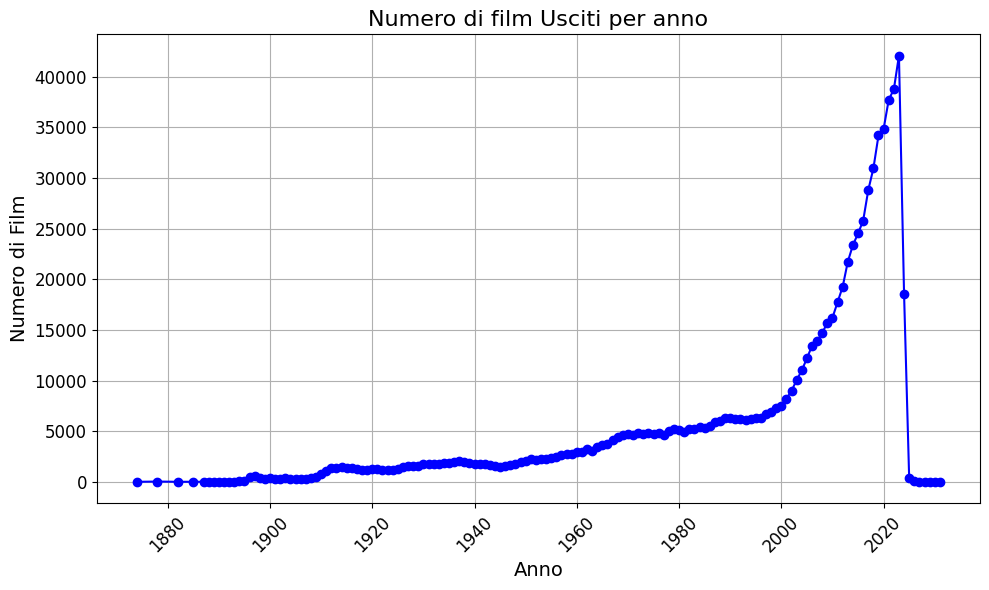

In [84]:
films_per_year = df_released_movies.groupby("date").size()
plt.figure(figsize=(10, 6))
plt.plot(films_per_year.index, films_per_year.values, marker='o', linestyle='-', color='blue', label="Numero di Film")

plt.title("Numero di film Usciti per anno", fontsize=16)
plt.xlabel("Anno", fontsize=14)
plt.ylabel("Numero di Film", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
max_y = films_per_year.max()
yticks = list(range(0, max_y + 10, 5000))  
plt.yticks(yticks, fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

notiamo un incremento nel tempo. fino ad un improvviso crollo, dovuto storicamente al Covid ......


Cerchiamo di vedere se la durata dei film nel tempo è anche cambiata.


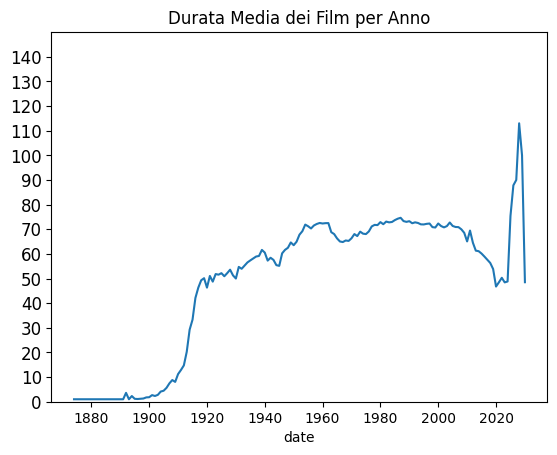

In [85]:
avg_duration_per_year = df_released_movies.groupby("date")["minute"].mean()
avg_duration_per_year.plot(kind="line", title="Durata Media dei Film per Anno")
plt.ylim(0, 150)
yticks = list(range(0, 140 + 10, 10))  
plt.yticks(yticks, fontsize=12)

plt.show()

<Axes: title={'center': 'Media dei Punteggi delle Recensioni per Anno'}, xlabel='date'>

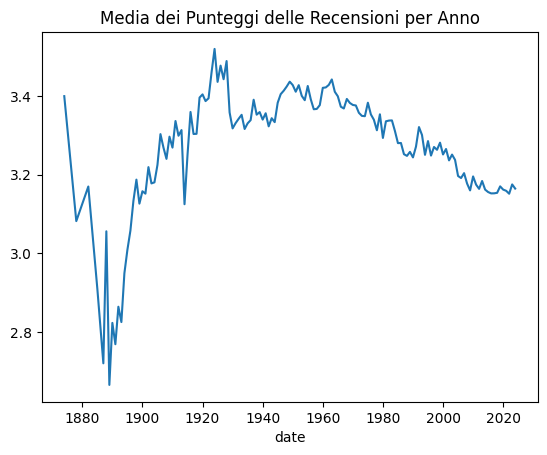

In [86]:
avg_ratings_per_year = df_released_movies.groupby("date")["rating"].mean()
avg_ratings_per_year.plot(kind="line", title="Media dei Punteggi delle Recensioni per Anno")

Possiamo pensare che il punteggio del rating del film sia correlato alla durata di esso, però questo potrebbe essere diverso rispetto a quello della critica


(0.0, 1000.0)

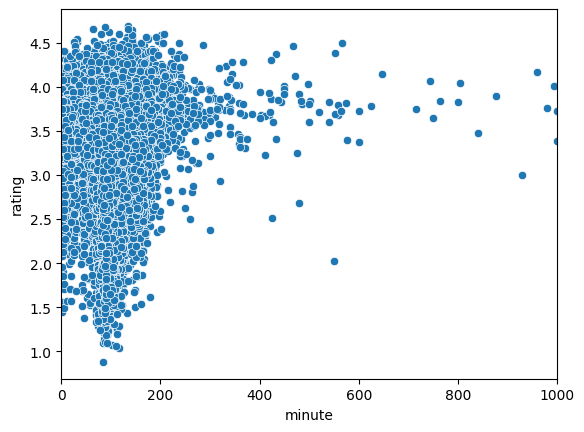

In [87]:
sns.scatterplot(data=df_released_movies, x="minute", y="rating")
plt.xlim(0, 1000)

<Axes: xlabel='release_count', ylabel='rating'>

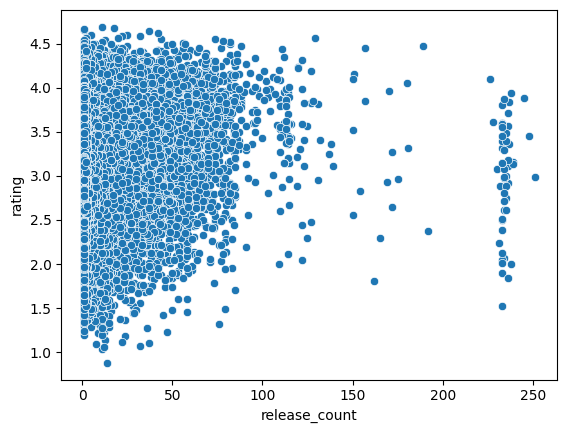

In [88]:
country_counts = df_releases.groupby("id_film").size()
merged_data = df_movies.merge(country_counts.rename("release_count"), left_on="id",right_on="id_film", how="left")
sns.scatterplot(data=merged_data, x="release_count", y="rating")

possiamo notare che la popolarità dei film non è influenzata drasticamente dal numero di paesi in cui è stato rilasciato, anche se la maggior parte dei nostri film sono stati rilasciati in meno di 100 paesi


## Analisi geografica


In [89]:
##provare questo e vedere se magari  vengono altre idee 
"""
merged_data = df_movies.merge(df_releases.rename(columns={"date":"release_date"}), left_on="id",right_on="id_film", how="left")
merged_data["release_date"]=pd.to_datetime(merged_data["release_date"], format="%m", errors="coerce")
merged_data.loc[1]
pivot = merged_data.pivot_table(index="id", columns="release_date", values="rating", aggfunc="mean")
sns.heatmap(pivot, cmap="coolwarm", annot=True)
"""

'\nmerged_data = df_movies.merge(df_releases.rename(columns={"date":"release_date"}), left_on="id",right_on="id_film", how="left")\nmerged_data["release_date"]=pd.to_datetime(merged_data["release_date"], format="%m", errors="coerce")\nmerged_data.loc[1]\npivot = merged_data.pivot_table(index="id", columns="release_date", values="rating", aggfunc="mean")\nsns.heatmap(pivot, cmap="coolwarm", annot=True)\n'

# Analisi del successo generale dei paesi produttori di film:

### ci sono paesi che hanno prodotto più film di alto successo ? Se si, di conseguenza gli attori di quel paese avranno vinto più premi ?


In [90]:
#impostiamo che un movie sia di sucesso se ha un rating maggiore o uguale a 4
df_successfull_movies= df_movies[df_movies["rating"]>=4]

#merge tra i film di successo e i corrispettivi paesi
successful_movies_countries= df_successfull_movies.merge(df_countries,left_on="id",right_on="id_film", how="left")

successful_movies_per_country = (
    successful_movies_countries.groupby('country')['id'].count().reset_index().rename(columns={'id': 'successful_movies_count'})
)
successful_movies_per_country = successful_movies_per_country.sort_values(
    by='successful_movies_count', ascending=False
)
print("Top 10 Paesi con il maggior numero di film di successo:\n ",  successful_movies_per_country.head(10))



Top 10 Paesi con il maggior numero di film di successo:
          country  successful_movies_count
85          USA                      941
84           UK                      333
40        Japan                      309
25       France                      287
27      Germany                      120
39        Italy                      105
74  South Korea                       93
77       Sweden                       44
75        Spain                       37
86         USSR                       35


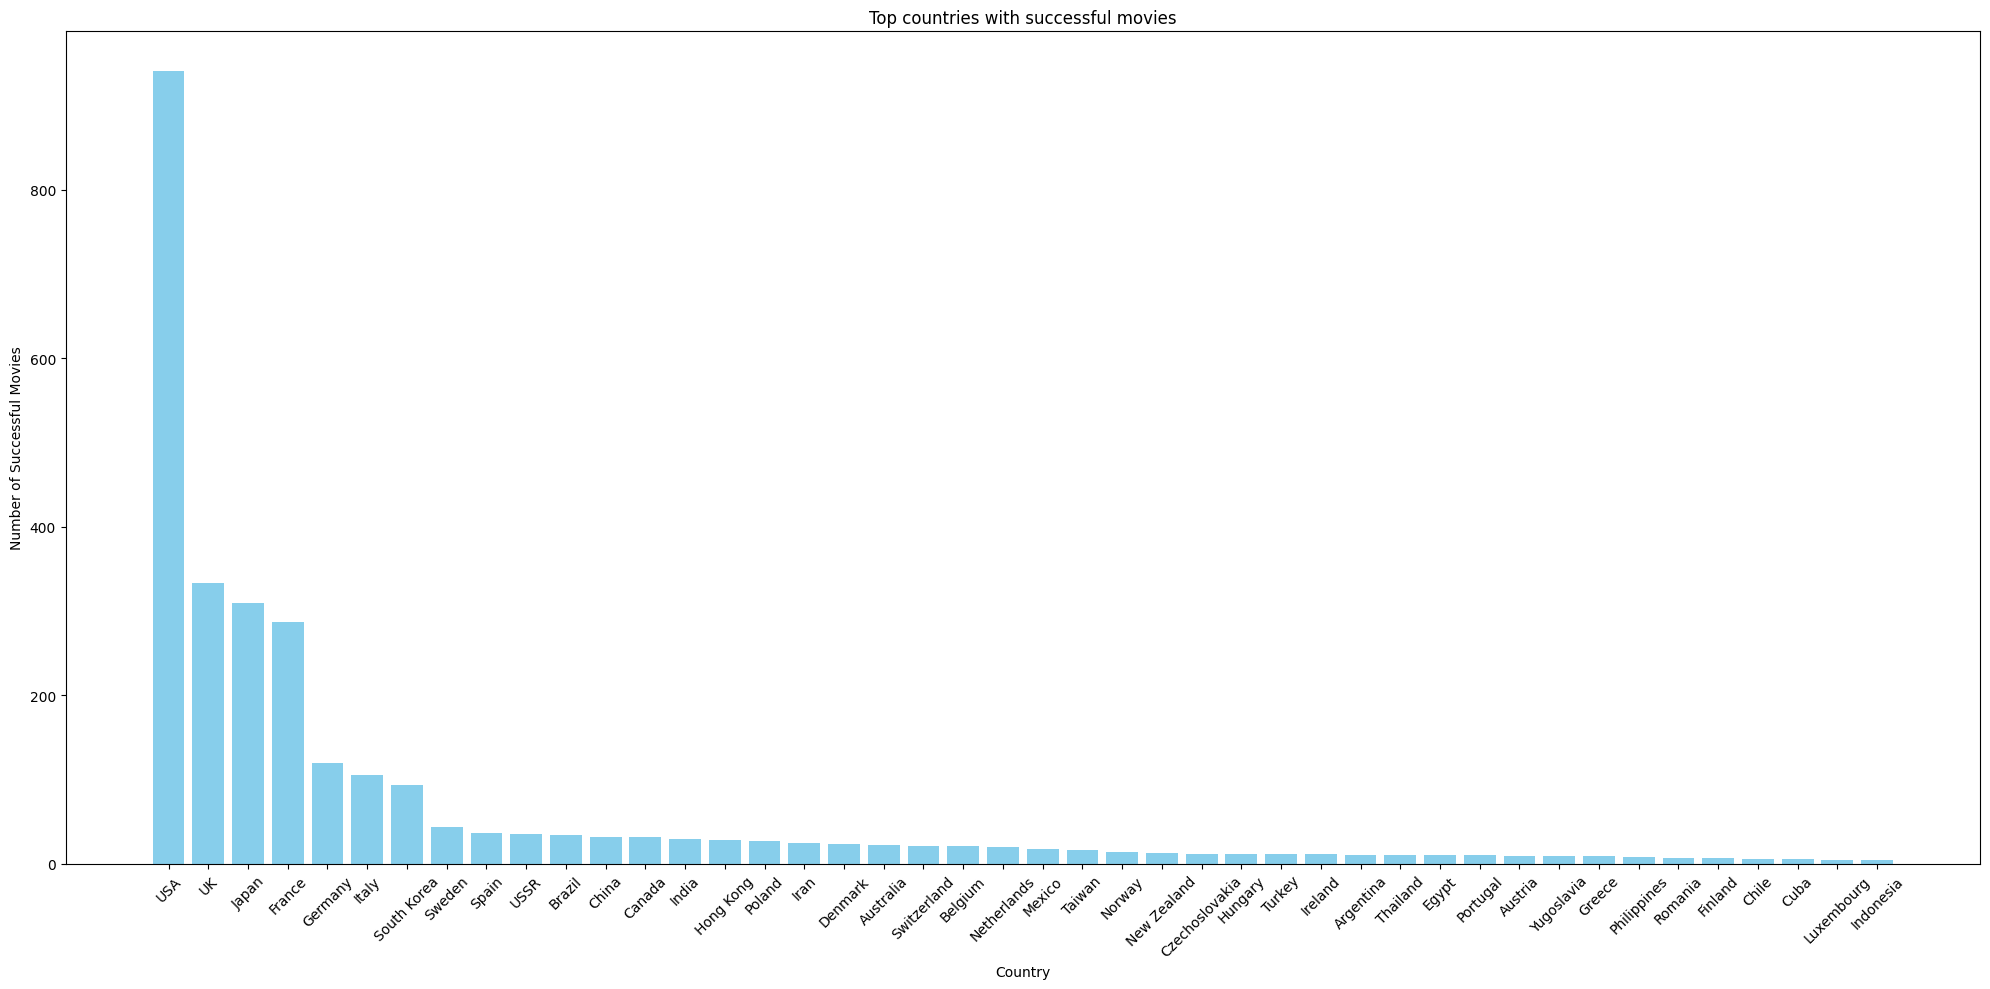

In [91]:
#abbiamo deciso di considerare solo i paesi che hanno almeno 5 film di successo, in modo da avere un campione più significativo
min_successful_movies = 5 
 
filtered_countries = successful_movies_per_country[
    successful_movies_per_country['successful_movies_count'] >= min_successful_movies
]
plt.figure(figsize=(20, 10))
plt.bar(filtered_countries['country'], filtered_countries['successful_movies_count'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Successful Movies')
plt.title('Top countries with successful movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Possiamo vedere che gli Stati Uniti sono il paese con il maggior numero di film di successo, seguito da Regno Unito e Francia.


In [106]:
#qua utiliziamo però tutto l'insieme dei film di successo
oscar_winners = df_oscars[df_oscars['winner'] == 1]

oscar_actors = pd.merge(df_actors, oscar_winners, left_on='name', right_on='name', how='inner') 

successful_actor_movies = pd.merge(successful_movies_countries, oscar_actors, left_on='id', right_on='id_film', how='inner')

print(successful_actor_movies.loc[0])

''''
oscar_count_per_country = (oscar_actors_countries.groupby('country')['winner'].count().reset_index().rename(columns={'winner': 'oscar_wins'})
)
'''


id                                                         1000003
name_x                           Everything Everywhere All at Once
date                                                        2022.0
tagline           The universe is so much bigger than you realize.
description      An aging Chinese immigrant is swept up in an i...
minute                                                       140.0
rating                                                         4.3
id_film_x                                                1000003.0
country                                                        USA
id_film_y                                                  1000003
name_y                                               Michelle Yeoh
role                                                   Evelyn Wang
year_film                                      2022-01-01 00:00:00
year_ceremony                                  2023-01-01 00:00:00
ceremony                                                      

"'\noscar_count_per_country = (oscar_actors_countries.groupby('country')['winner'].count().reset_index().rename(columns={'winner': 'oscar_wins'})\n)\n"

In [101]:
oscar_count_per_country = (
    oscar_actors_countries.groupby('country')['winner']
    .count()
    .reset_index()
    .rename(columns={'winner': 'oscar_wins'})
)

# Unisci i dati dei film di successo con gli Oscar
final_data = pd.merge(successful_movies_per_country, oscar_count_per_country, on='country', how='left')
final_data = final_data.fillna(0)  # Sostituisci i NaN con 0 per i paesi senza Oscar

# Ordina i risultati
final_data = final_data.sort_values(by='oscar_wins', ascending=False)

# Visualizza i primi 10 paesi
print(final_data.head(10))

NameError: name 'oscar_actors_countries' is not defined

######

vietati in quale stato (raggruppare i rating di PG vietato ai minori)

quante uscite per ogni anno(anche in base a quanti "caratteristica varia: ")

film vietati ai minori

istogramma di frequenze

oscar in base a qualcosa

fare confronti intelligenti

notare che i rating della critica sono diversi da quelli degli utenti (quindi magari aggiungere qualcosa anche sopra )

dare uno scopo alla propria analisi (molto intelligente fare 2 analisi diverse)
dove si dà un senso alla analisi che si fà tipo " Notare che l'africa ha un sacco di oscar"


# Come i temi dei film sono cambiati nel tempo


In [135]:
df_themes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125641 entries, 0 to 125640
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id_film  125641 non-null  int64 
 1   theme    125641 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [358]:
df_released_cl_data = df_movies.dropna(subset=["date"])[["id", "date", "rating"]]

In [359]:
df_released_cl_data["date"] = df_released_cl_data["date"].astype(int)

In [360]:
df_released_cl_data.groupby("date")["name"].count().tolist()

KeyError: 'Column not found: name'

{'whiskers': [<matplotlib.lines.Line2D at 0x3a18a5040>,
 'caps': [<matplotlib.lines.Line2D at 0x3a18a52e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x3908e7860>],
 'medians': [<matplotlib.lines.Line2D at 0x3a18a4470>],
 'fliers': [<matplotlib.lines.Line2D at 0x3a18a5a60>],
 'means': []}

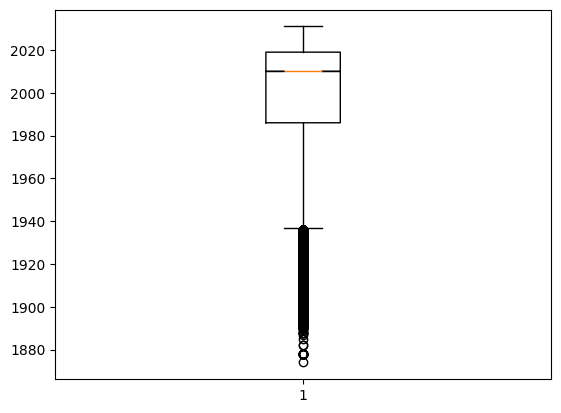

In [362]:
plt.boxplot(df_released_cl_data["date"], df_released_cl_data.groupby("date")["rating"].count().tolist())

In [363]:
data_film_count = df_released_cl_data.groupby("date")["rating"].count()

In [365]:
data_film_count

date
1874     1
1878    26
1882     2
1885     1
1887     1
        ..
2027     0
2028     0
2029     0
2030     0
2031     0
Name: rating, Length: 149, dtype: int64

(array([1.000e+00, 0.000e+00, 0.000e+00, 2.600e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 5.000e+00, 2.000e+00, 7.000e+00, 7.000e+00, 5.000e+00,
        3.700e+01, 4.000e+01, 1.290e+02, 7.400e+01, 4.100e+01, 4.400e+01,
        6.800e+01, 4.400e+01, 3.000e+01, 4.700e+01, 3.300e+01, 3.600e+01,
        3.300e+01, 4.300e+01, 3.100e+01, 3.200e+01, 2.000e+01, 2.100e+01,
        4.000e+01, 9.500e+01, 3.800e+01, 4.500e+01, 3.500e+01, 3.900e+01,
        5.400e+01, 4.700e+01, 6.200e+01, 5.500e+01, 3.800e+01, 4.900e+01,
        6.300e+01, 6.100e+01, 7.500e+01, 1.030e+02, 1.360e+02, 1.290e+02,
        1.680e+02, 4.140e+02, 2.230e+02, 2.030e+02, 2.130e+02, 1.960e+02,
        1.880e+02, 1.950e+02, 1.880e+02, 2.000e+02, 2.120e+02, 2.110e+02,
        1.960e+02, 1.920e+02, 2.000e+02, 2.240e+02, 2.340e+02, 2.550e+02,
        2.470e+02, 2.490e+02, 5.090e+02, 2.680e+02, 2.920e+02, 2.950e+02,
        3.070e+02, 3.200e+02, 3.010e+0

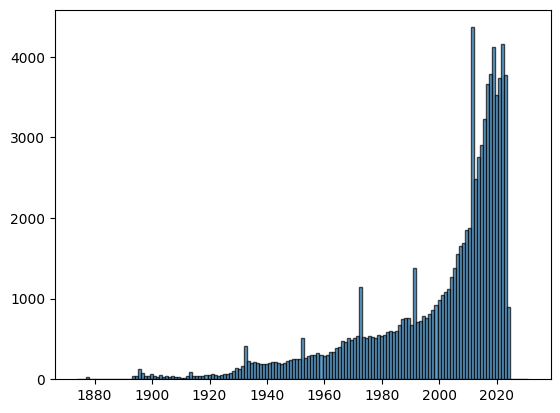

In [366]:
plt.hist(data_film_count.index, weights=data_film_count.values, bins=data_film_count.shape[0], edgecolor="black", alpha=0.7)


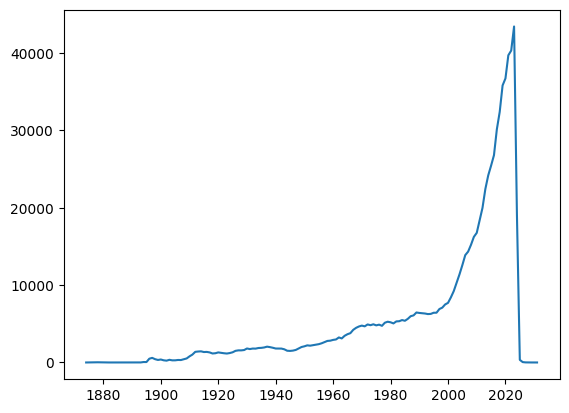

In [231]:
plt.plot(data_film_count)


In [367]:
df_data_filtered = df_released_cl_data[1910<df_released_cl_data["date"]]


In [368]:
df_themes.columns, df_data_filtered.columns

(Index(['id_film', 'theme'], dtype='object'),
 Index(['id', 'date', 'rating'], dtype='object'))

[2020 2010 1990 2000 1980 1970 1960 1950 1940 1930 1920 1910]


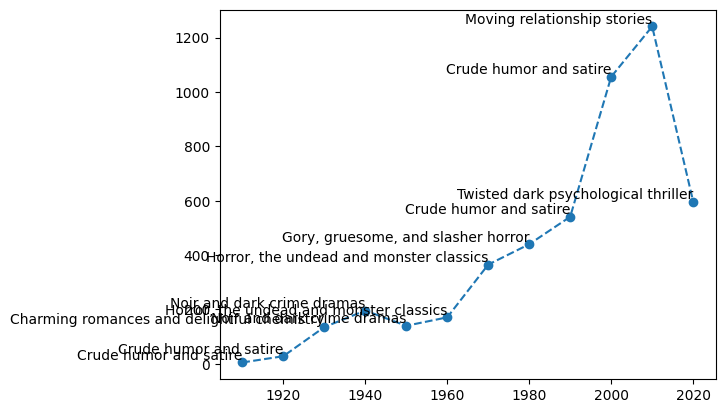

In [403]:
merged_themes = df_themes.merge(df_data_filtered, how="inner", left_on="id_film", right_on="id")
merged_themes["date_bin"] = (merged_themes["date"] // 10) * 10 
print(merged_themes["date_bin"].unique())
df_date_theme = merged_themes[["date_bin", "theme"]].groupby("date_bin").value_counts().to_frame()
idx = df_date_theme.groupby(level=0)["count"].idxmax()
df_date_hot_theme = df_date_theme.loc[idx].reset_index()
plt.plot(df_date_hot_theme["date_bin"], df_date_hot_theme["count"], 'o--')
for i, txt in enumerate(df_date_hot_theme["theme"]):
    plt.text(df_date_hot_theme["date_bin"].iloc[i], df_date_hot_theme["count"].iloc[i], txt, fontsize=10, ha="right", va="bottom")



In [354]:
df_genres.columns

Index(['id_film', 'genre'], dtype='object')

[2020 2010 1990 2000 1980 1970 1960 1950 1940 1930 1920 1910 2030]


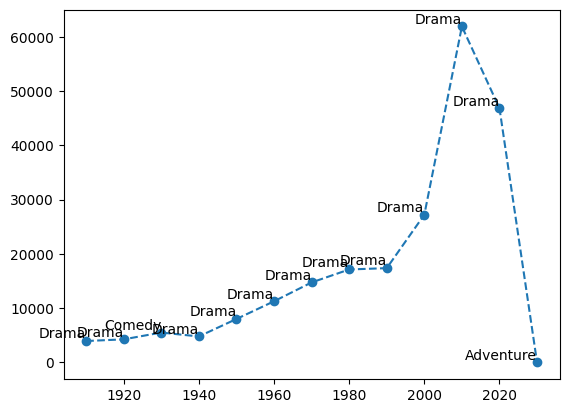

In [404]:
merged_genre = df_genres.merge(df_data_filtered, how="inner", left_on="id_film", right_on="id")
merged_genre["date_bin"] = (merged_genre["date"] // 10) * 10
print(merged_genre["date_bin"].unique())
df_date_genre = merged_genre[["date_bin", "genre"]].groupby("date_bin").value_counts().to_frame()
idx = df_date_genre.groupby(level=0)["count"].idxmax()
df_date_hot_genre = df_date_genre.loc[idx].reset_index()
plt.plot(df_date_hot_genre["date_bin"], df_date_hot_genre["count"], 'o--')
for i, txt in enumerate(df_date_hot_genre["genre"]):
    plt.text(df_date_hot_genre["date_bin"].iloc[i], df_date_hot_genre["count"].iloc[i], txt, fontsize=10, ha="right", va="bottom")

[2020 2010 1990 2000 1980 1970 1960 1950 1940 1930 1920 1910 2030]


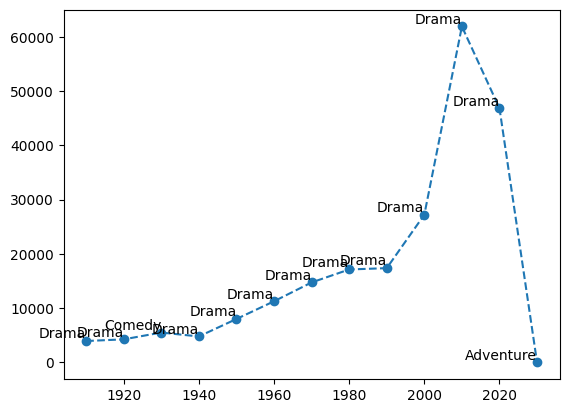

In [406]:
merged_genre = df_genres.merge(df_data_filtered, how="inner", left_on="id_film", right_on="id")
merged_genre["date_bin"] = (merged_genre["date"] // 10) * 10
print(merged_genre["date_bin"].unique())
df_date_genre = merged_genre[["date_bin", "genre"]].groupby("date_bin").value_counts().to_frame()
idx = df_date_genre.groupby(level=0)["count"].idxmax()
df_date_hot_genre = df_date_genre.loc[idx].reset_index()
plt.plot(df_date_hot_genre["date_bin"], df_date_hot_genre["count"], 'o--')
for i, txt in enumerate(df_date_hot_genre["genre"]):
    plt.text(df_date_hot_genre["date_bin"].iloc[i], df_date_hot_genre["count"].iloc[i], txt, fontsize=10, ha="right", va="bottom")

In [407]:
genre_rating = merged_genre[["date_bin", "genre", "rating"]].groupby(["date_bin", "genre"]).mean().fillna(0)

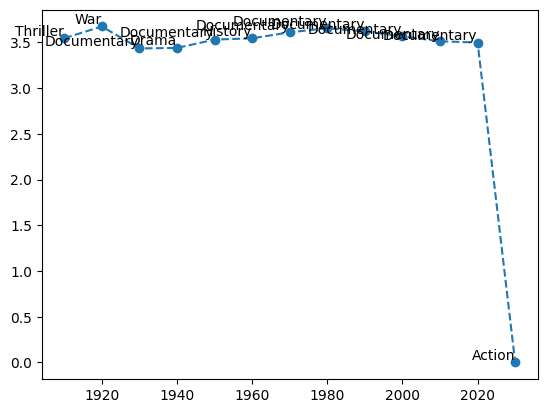

In [408]:
idx = genre_rating.groupby(level=0)["rating"].idxmax()
df_date_best_genre = genre_rating.loc[idx].reset_index()
plt.plot(df_date_best_genre["date_bin"], df_date_best_genre["rating"], 'o--')
for i, txt in enumerate(df_date_best_genre["genre"]):
    plt.text(df_date_best_genre["date_bin"].iloc[i], df_date_best_genre["rating"].iloc[i], txt, fontsize=10, ha="right", va="bottom")

In [409]:
genre_rating_dropped = merged_genre[["date_bin", "genre", "rating"]].groupby(["date_bin", "genre"]).mean().dropna(subset=["rating"])


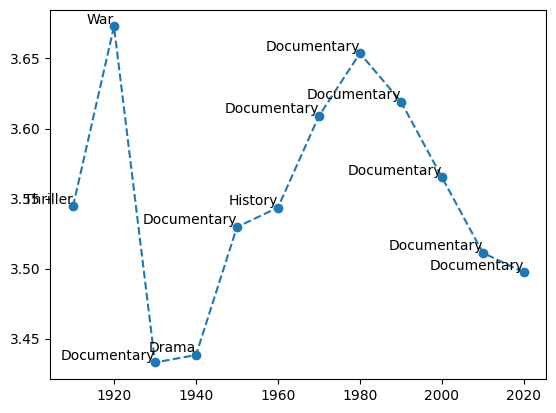

In [410]:
idx = genre_rating_dropped.groupby(level=0)["rating"].idxmax()
df_date_best_genre = genre_rating_dropped.loc[idx].reset_index()
plt.plot(df_date_best_genre["date_bin"], df_date_best_genre["rating"], 'o--')
for i, txt in enumerate(df_date_best_genre["genre"]):
    plt.text(df_date_best_genre["date_bin"].iloc[i], df_date_best_genre["rating"].iloc[i], txt, fontsize=10, ha="right", va="bottom")

In [435]:
tot_counts = merged_genre[["date_bin", "genre", "rating"]].groupby(["date_bin"]).count()["rating"].values

In [487]:
merged_genre[["date_bin", "genre", "rating"]].groupby(["date_bin", "genre"]).mean()

rating
date_bin genre                    
1910     Action           3.427083
         Adventure        3.279412
         Animation        3.429444
         Comedy           3.221404
         Crime            3.447576
...                            ...
2030     Drama                 NaN
         Fantasy               NaN
         History               NaN
         Music                 NaN
         Science Fiction       NaN

[235 rows x 1 columns]

In [437]:
def weighted_avg_rating_genre_num(x):
    global tot_counts
    m = x.mean()
    c = x.count()
    return m*c
    

In [479]:
def weighted_avg_rating_genre(x):
    print(x)
    return x.count()

In [ ]:
genre_rating_dropped_agg = merged_genre[["date_bin", "genre", "rating"]].groupby(["date_bin", "genre"]).agg(weighted_avg_rating_genre_num).dropna()
flatten_df = genre_rating_dropped_agg.reset_index(level=[0,1])



AttributeError: 'Series' object has no attribute 'id'